In [4]:
# import all libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import scipy.stats as stats


## Import all Dataset

In [5]:
# import all dataset and organize them

# import the dataset from first resource
# NBA Players(1996-2022).csv
nba_players = pd.read_csv('./Datasets/NBA Players(1996-2022).csv')

In [6]:
# import the dataset from 2nd resource
# common_players_info.csv, game.csv, etc...

common_players_info = pd.read_csv('./Datasets/NBA Database Datasets/common_player_info.csv')
game = pd.read_csv('./Datasets/NBA Database Datasets/game.csv')
player_2nd = pd.read_csv('./Datasets/NBA Database Datasets/player.csv')

In [7]:
# import the dataset from third resource
player_3rd = pd.read_csv('./Datasets/Players Since 1950/player_data.csv')
Seasons_Stats = pd.read_csv('./Datasets/Players Since 1950/Seasons_Stats.csv')

In [8]:
nba_players.info()
nba_players.describe()
nba_players.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

(12844, 22)

In [9]:
nba_players.head(10)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
5,5,Gerald Wilkins,ORL,33.0,198.12,102.058200,Tennessee-Chattanooga,USA,1985,2,...,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,1996-97
6,6,Gheorghe Muresan,WAS,26.0,231.14,137.438376,NaN,USA,1993,2,...,10.6,6.6,0.4,6.9,0.098,0.217,0.185,0.618,0.024,1996-97
7,7,Glen Rice,CHH,30.0,203.20,99.790240,Michigan,USA,1989,1,...,26.8,4.0,2.0,3.2,0.025,0.087,0.272,0.605,0.088,1996-97
8,8,Glenn Robinson,MIL,24.0,200.66,106.594120,Purdue,USA,1994,1,...,21.1,6.3,3.1,-2.9,0.051,0.144,0.278,0.528,0.146,1996-97
9,9,Grant Hill,DET,24.0,203.20,102.058200,Duke,USA,1994,1,...,21.4,9.0,7.3,6.9,0.049,0.232,0.283,0.556,0.356,1996-97


### Data Wrangling


In [10]:
# check for missing values
nba_players.isnull().sum()  

Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

In [11]:
# Replacement of missing data (if any)
nba_players['college'].fillna('None', inplace=True)
nba_players.isnull().sum()  

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [12]:
# find players names that repeated in the dataset
nba_players['player_name'].value_counts()


player_name
Vince Carter       22
Dirk Nowitzki      21
Kevin Garnett      20
Udonis Haslem      20
Kobe Bryant        20
                   ..
Josh Akognon        1
Fab Melo            1
John Long           1
Luke Zeller         1
John Butler Jr.     1
Name: count, Length: 2551, dtype: int64

In [13]:
nba_players['draft_round'] = nba_players['draft_round'].replace('Undrafted', -1)
nba_players['draft_year'] = nba_players['draft_year'].replace('Undrafted', -1)
nba_players['draft_number'] = nba_players['draft_number'].replace('Undrafted', -1)

In [14]:
nba_players['draft_round'] = nba_players['draft_round'].astype(int)
nba_players['draft_year'] = nba_players['draft_year'].astype(int)
nba_players['draft_number'] = nba_players['draft_number'].astype(int)

### Determination of the Pearson correlation coefficient among quantitative data


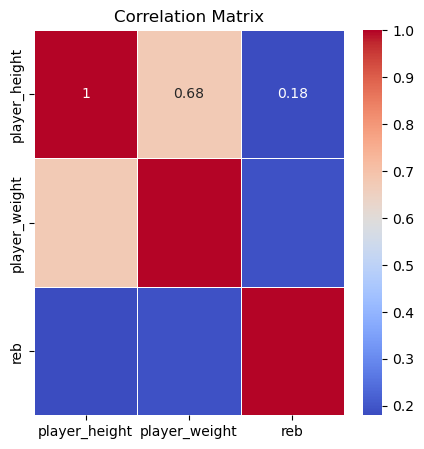

,player_height,player_weight,reb
player_height,1.000000,0.675916,0.179963
player_weight,0.675916,1.000000,0.191942
reb,0.179963,0.191942,1.000000


In [22]:
# Determination of the Pearson correlation coefficient among player_height, player_weight, and net_rating
nba_players[['player_height', 'player_weight', 'reb']].corr()

# Visualization of the correlation matrix with the r squared values
plt.figure(figsize=(5, 5))
sns.heatmap(nba_players[['player_height', 'player_weight', 'reb']].corr()**2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# print the r^2 value
nba_players[['player_height', 'player_weight', 'reb']].corr()**2


slope: 1.1213194670846915
intercept: -124.62305477474703
r_value: 0.8221411921651964
p_value: 0.0
std_err: 0.006851652402524485


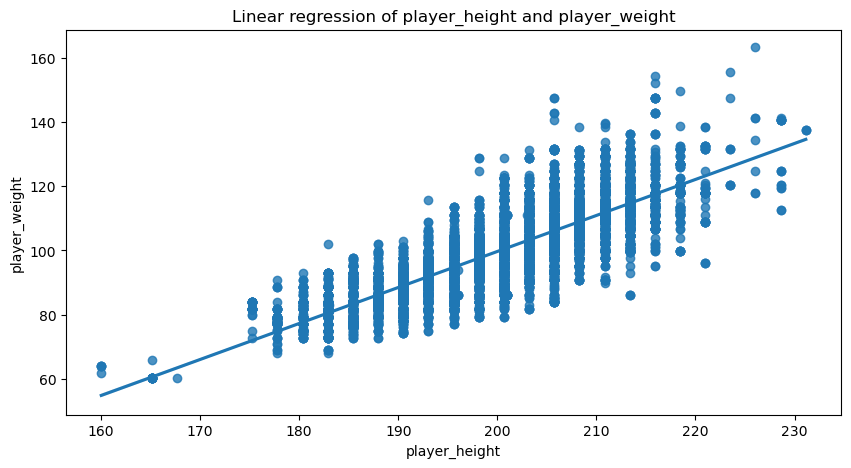

In [26]:
# what would be the best fit type for the relationship between player_height and player_weight?


# linear regression of player_height and player_weight
slope, intercept, r_value, p_value, std_err = stats.linregress(nba_players['player_height'], nba_players['player_weight'])
print('slope:', slope)
print('intercept:', intercept)
print('r_value:', r_value)
print('p_value:', p_value)
print('std_err:', std_err)

# draw the linear regression line
plt.figure(figsize=(10, 5))
sns.regplot(x='player_height', y='player_weight', data=nba_players)
plt.title('Linear regression of player_height and player_weight')
plt.show()

